# Klasifikasi Rock, Paper, dan Scissors

Nama : Halimul Hakim Khairul

Dataset yang digunakan dapat diunduh pada link [berikut](https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip). Kemudian simpan Dataset didalam sebuah Folder pada Gdrive

## 1. Import Library

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm

## 2. Import Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Direktori Dataset

In [ ]:
%cd /content/drive/MyDrive/Dicoding

/content/drive/MyDrive/Dicoding


###List isi file pada Direktori

In [ ]:
!ls

__MACOSX  rockpaperscissors  rockpaperscissors.zip


###Unzip File rockpaperscissor.zip

In [ ]:
!unzip 'rockpaperscissors.zip'

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [ ]:
PATH = 'rockpaperscissors/rps-cv-images'

##3. Pre-processing data dengan image augmentation.

In [ ]:
data_gen = ImageDataGenerator(rescale = 1./255,
                              rotation_range=20,
                              horizontal_flip=True,
                              shear_range =0.2,
                              fill_mode='nearest',
                              validation_split = 0.4)

In [ ]:
NUM_TRAIN_DATA = 1314
NUM_TEST_DATA = 874

BATCH_SIZE = 64

IMG_HEIGHT = 100
IMG_WIDTH = 150

##4. Mempersiapkan data latih yang akan dipelajari oleh model.

In [ ]:
train_generator = data_gen.flow_from_directory(PATH,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                                               batch_size = BATCH_SIZE,
                                               class_mode = 'categorical',
                                               subset='training')

Found 1314 images belonging to 3 classes.


In [ ]:
val_generator = data_gen.flow_from_directory(PATH,
                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                             batch_size = BATCH_SIZE,
                                             class_mode = 'categorical',
                                             subset='validation')

Found 874 images belonging to 3 classes.


In [ ]:
train_generator.image_shape

(100, 150, 3)

In [ ]:
val_generator.image_shape

(100, 150, 3)

##5. Membangun arsitektur model dengan Convolutional Neural Network (CNN).

In [ ]:
model = Sequential([Conv2D(32, (3,3), kernel_constraint=max_norm(3), bias_constraint=max_norm(3),
                           padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
                    MaxPool2D(2,2),

                    Conv2D(64, (3,3), kernel_constraint=max_norm(3), bias_constraint=max_norm(3),
                           padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
                    MaxPool2D(2,2),

                    Conv2D(128, (3,3), kernel_constraint=max_norm(3), bias_constraint=max_norm(3),
                           padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
                    MaxPool2D(2,2),
                    
                    Conv2D(256, (3,3), kernel_constraint=max_norm(3), bias_constraint=max_norm(3),
                           padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
                    MaxPool2D(2,2), 

                    Flatten(),
                    Dropout(0.5),

                    Dense(512, kernel_constraint=max_norm(3), bias_constraint=max_norm(3), activation='relu'),
                    Dense(3, kernel_constraint=max_norm(3), bias_constraint=max_norm(3), activation='softmax')
                    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 18, 128)      0

##6. Compile dan latih model dengan model.compile dan model.fit hingga mendapatkan akurasi yang diinginkan.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data=val_generator,
                    steps_per_epoch=10, validation_steps=2, epochs=20)

Epoch 1/20
10/10 [==============================] - 36s 3s/step - loss: 1.1645 - accuracy: 0.3375 - val_loss: 1.0966 - val_accuracy: 0.3203
Epoch 2/20
10/10 [==============================] - 31s 3s/step - loss: 1.0852 - accuracy: 0.3639 - val_loss: 1.0692 - val_accuracy: 0.3125
Epoch 3/20
10/10 [==============================] - 33s 3s/step - loss: 0.9667 - accuracy: 0.5594 - val_loss: 0.8076 - val_accuracy: 0.6406
Epoch 4/20
10/10 [==============================] - 31s 3s/step - loss: 0.6678 - accuracy: 0.7016 - val_loss: 0.5462 - val_accuracy: 0.7500
Epoch 5/20
10/10 [==============================] - 32s 3s/step - loss: 0.4939 - accuracy: 0.7937 - val_loss: 0.2933 - val_accuracy: 0.9375
Epoch 6/20
10/10 [==============================] - 31s 3s/step - loss: 0.3627 - accuracy: 0.8625 - val_loss: 0.3385 - val_accuracy: 0.9062
Epoch 7/20
10/10 [==============================] - 30s 3s/step - loss: 0.2866 - accuracy: 0.8967 - val_loss: 0.2783 - val_accuracy: 0.9141
Epoch 8/20
10/10 [==

##7. Membuat Plot Akurasi dan Loss Model

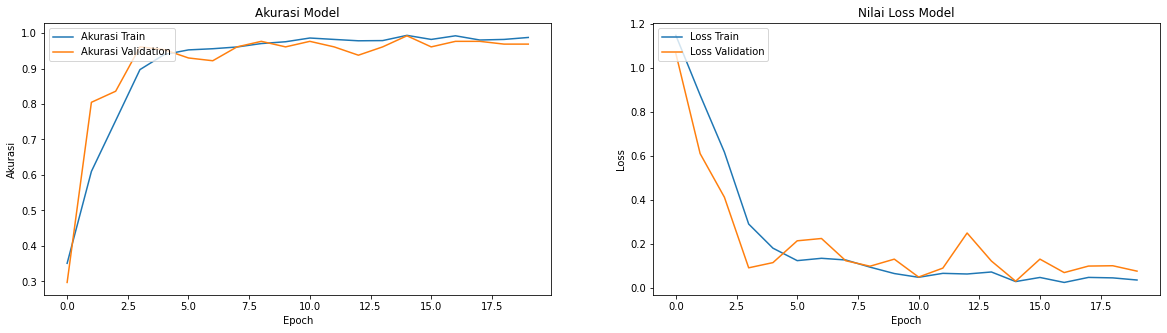

In [ ]:
# plotting akurasi model

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(20,5))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Akurasi Model')
ax[0].set_ylabel('Akurasi')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Akurasi Train', 'Akurasi Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Nilai Loss Model')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Loss Train', 'Loss Validation'], loc='upper left')

plt.show()

##8. Menguji model yang telah dibuat dengan menggunakan gambar yang belum dikenali oleh model.

### Paper

[[1. 0. 0.]]
Ini adalah Kertas


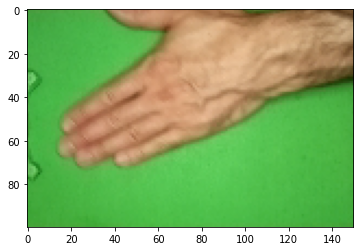

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

data = 'rockpaperscissors/rps-cv-images/paper/0RA9rcrv8iVvuDDU.png'

img = image.load_img(data, target_size=(IMG_HEIGHT, IMG_WIDTH))
imgplot = plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
prediksi = model.predict(images)

print(prediksi)

if prediksi[0][0] == 1:
  print('Ini adalah Kertas')
elif prediksi[0][1] == 1:
  print('Ini adalah Batu')
elif prediksi[0][2] == 1:
  print('Ini adalah Gunting')
else:
  print('Tidak ada yang benar')

### Rock

[[0. 1. 0.]]
Ini adalah Batu


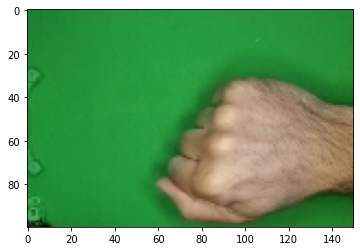

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

data = '/content/drive/MyDrive/Dicoding/rockpaperscissors/rps-cv-images/rock/00nKV8oHuTGi20gq.png'

img = image.load_img(data, target_size=(IMG_HEIGHT, IMG_WIDTH))
imgplot = plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
prediksi = model.predict(images)

print(prediksi)

if prediksi[0][0] == 1:
  print('Ini adalah Kertas')
elif prediksi[0][1] == 1:
  print('Ini adalah Batu')
elif prediksi[0][2] == 1:
  print('Ini adalah Gunting')
else:
  print('Tidak ada yang benar')

### Scissors

[[0. 0. 1.]]
Ini adalah Gunting


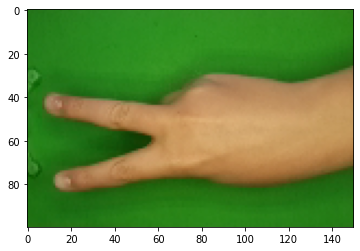

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

data = '/content/drive/MyDrive/Dicoding/rockpaperscissors/rps-cv-images/scissors/0CSaM2vL2cWX6Cay.png'

img = image.load_img(data, target_size=(IMG_HEIGHT, IMG_WIDTH))
imgplot = plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
prediksi = model.predict(images)

print(prediksi)

if prediksi[0][0] == 1:
  print('Ini adalah Kertas')
elif prediksi[0][1] == 1:
  print('Ini adalah Batu')
elif prediksi[0][2] == 1:
  print('Ini adalah Gunting')
else:
  print('Tidak ada yang benar')

In [ ]:
prediksi

array([[0., 0., 1.]], dtype=float32)

In [ ]:
prediksi[0][0]

0.0

In [ ]:
prediksi[0][1]

0.0

In [ ]:
prediksi[0][2]

1.0

### Tes Data Baru

[[1. 0. 0.]]
Ini adalah Kertas


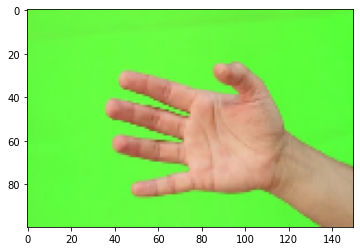

In [ ]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

data = '/content/drive/MyDrive/Data Test Dicoding/depositphotos_201891706-stock-video-playing-rock-paper-scissors-close.jpg'

img = image.load_img(data, target_size=(IMG_HEIGHT, IMG_WIDTH))
imgplot = plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
prediksi = model.predict(images)

print(prediksi)

if prediksi[0][0] == 1:
  print('Ini adalah Kertas')
elif prediksi[0][1] == 1:
  print('Ini adalah Batu')
elif prediksi[0][2] == 1:
  print('Ini adalah Gunting')
else:
  print('Tidak ada yang benar')